In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [2]:
d= pd.read_csv(r'D:\internfolder\temperature forecast.csv')
d

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
d.shape

(7752, 25)

In [4]:
d.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
d=d.dropna()

In [7]:
d.shape

(7588, 25)

In [8]:
d.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
d.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [12]:
d['Date']=d['Date'].astype("datetime64[ns]")


In [13]:
d["day"] = pd.to_datetime(d.Date, format="%d/%m/%Y").dt.day
d["month"] = pd.to_datetime(d.Date, format="%d/%m/%Y").dt.month
d["year"] = pd.to_datetime(d.Date, format="%d/%m/%Y").dt.year

In [14]:
d=d.drop(['Date'],axis=1)
d.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [16]:
d.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,16.337375,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.216880,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


In [17]:
d.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.028312,-0.082267,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


<AxesSubplot:>

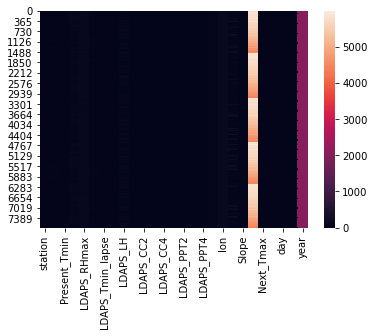

In [18]:
sns.heatmap(d)

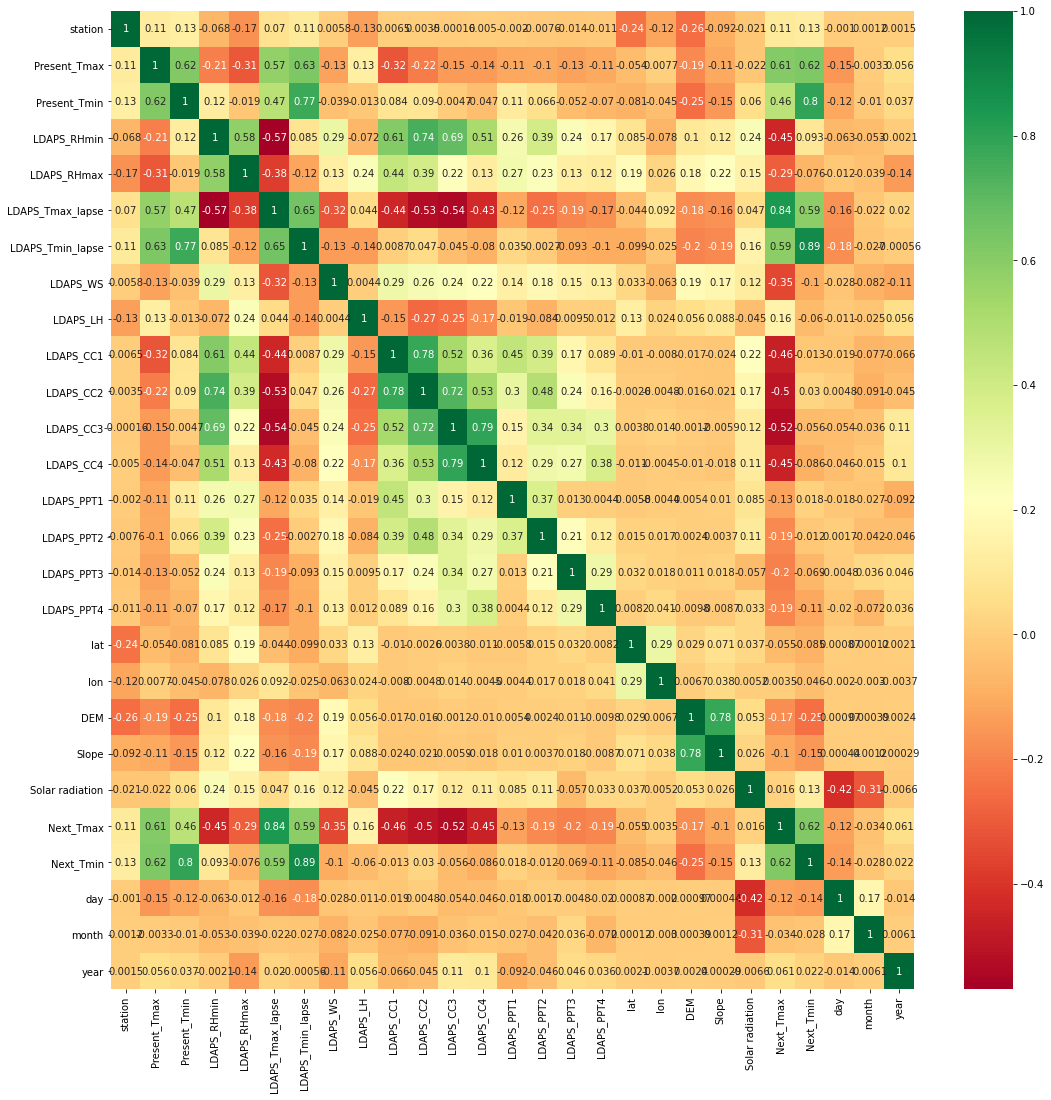

In [20]:
plt.figure(figsize = (18,18))
sns.heatmap(d.corr(), annot = True, cmap = "RdYlGn")

plt.show()

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

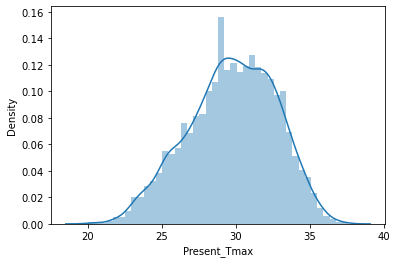

In [21]:
sns.distplot(d['Present_Tmax'])

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

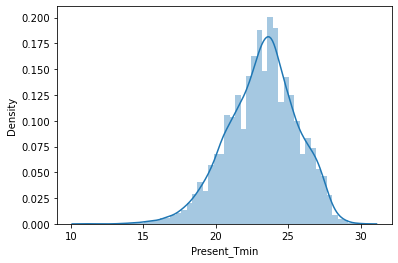

In [22]:
sns.distplot(d['Present_Tmin'])

# checking outliers

station                AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Present_Tmax        AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Present_Tmin         AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
LDAPS_RHmin         AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
LDAPS_RHmax         AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
LDAPS_Tmax_lapse       AxesSubplot(0.125,0.677439;0.133621x0.0920732)
LDAPS_Tmin_lapse    AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
LDAPS_WS             AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
LDAPS_LH            AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
LDAPS_CC1           AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
LDAPS_CC2              AxesSubplot(0.125,0.566951;0.133621x0.0920732)
LDAPS_CC3           AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
LDAPS_CC4            AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
LDAPS_PPT1          AxesSubplot(0.606034,0.566951;0.133621x0.0920732)
LDAPS_PPT2          

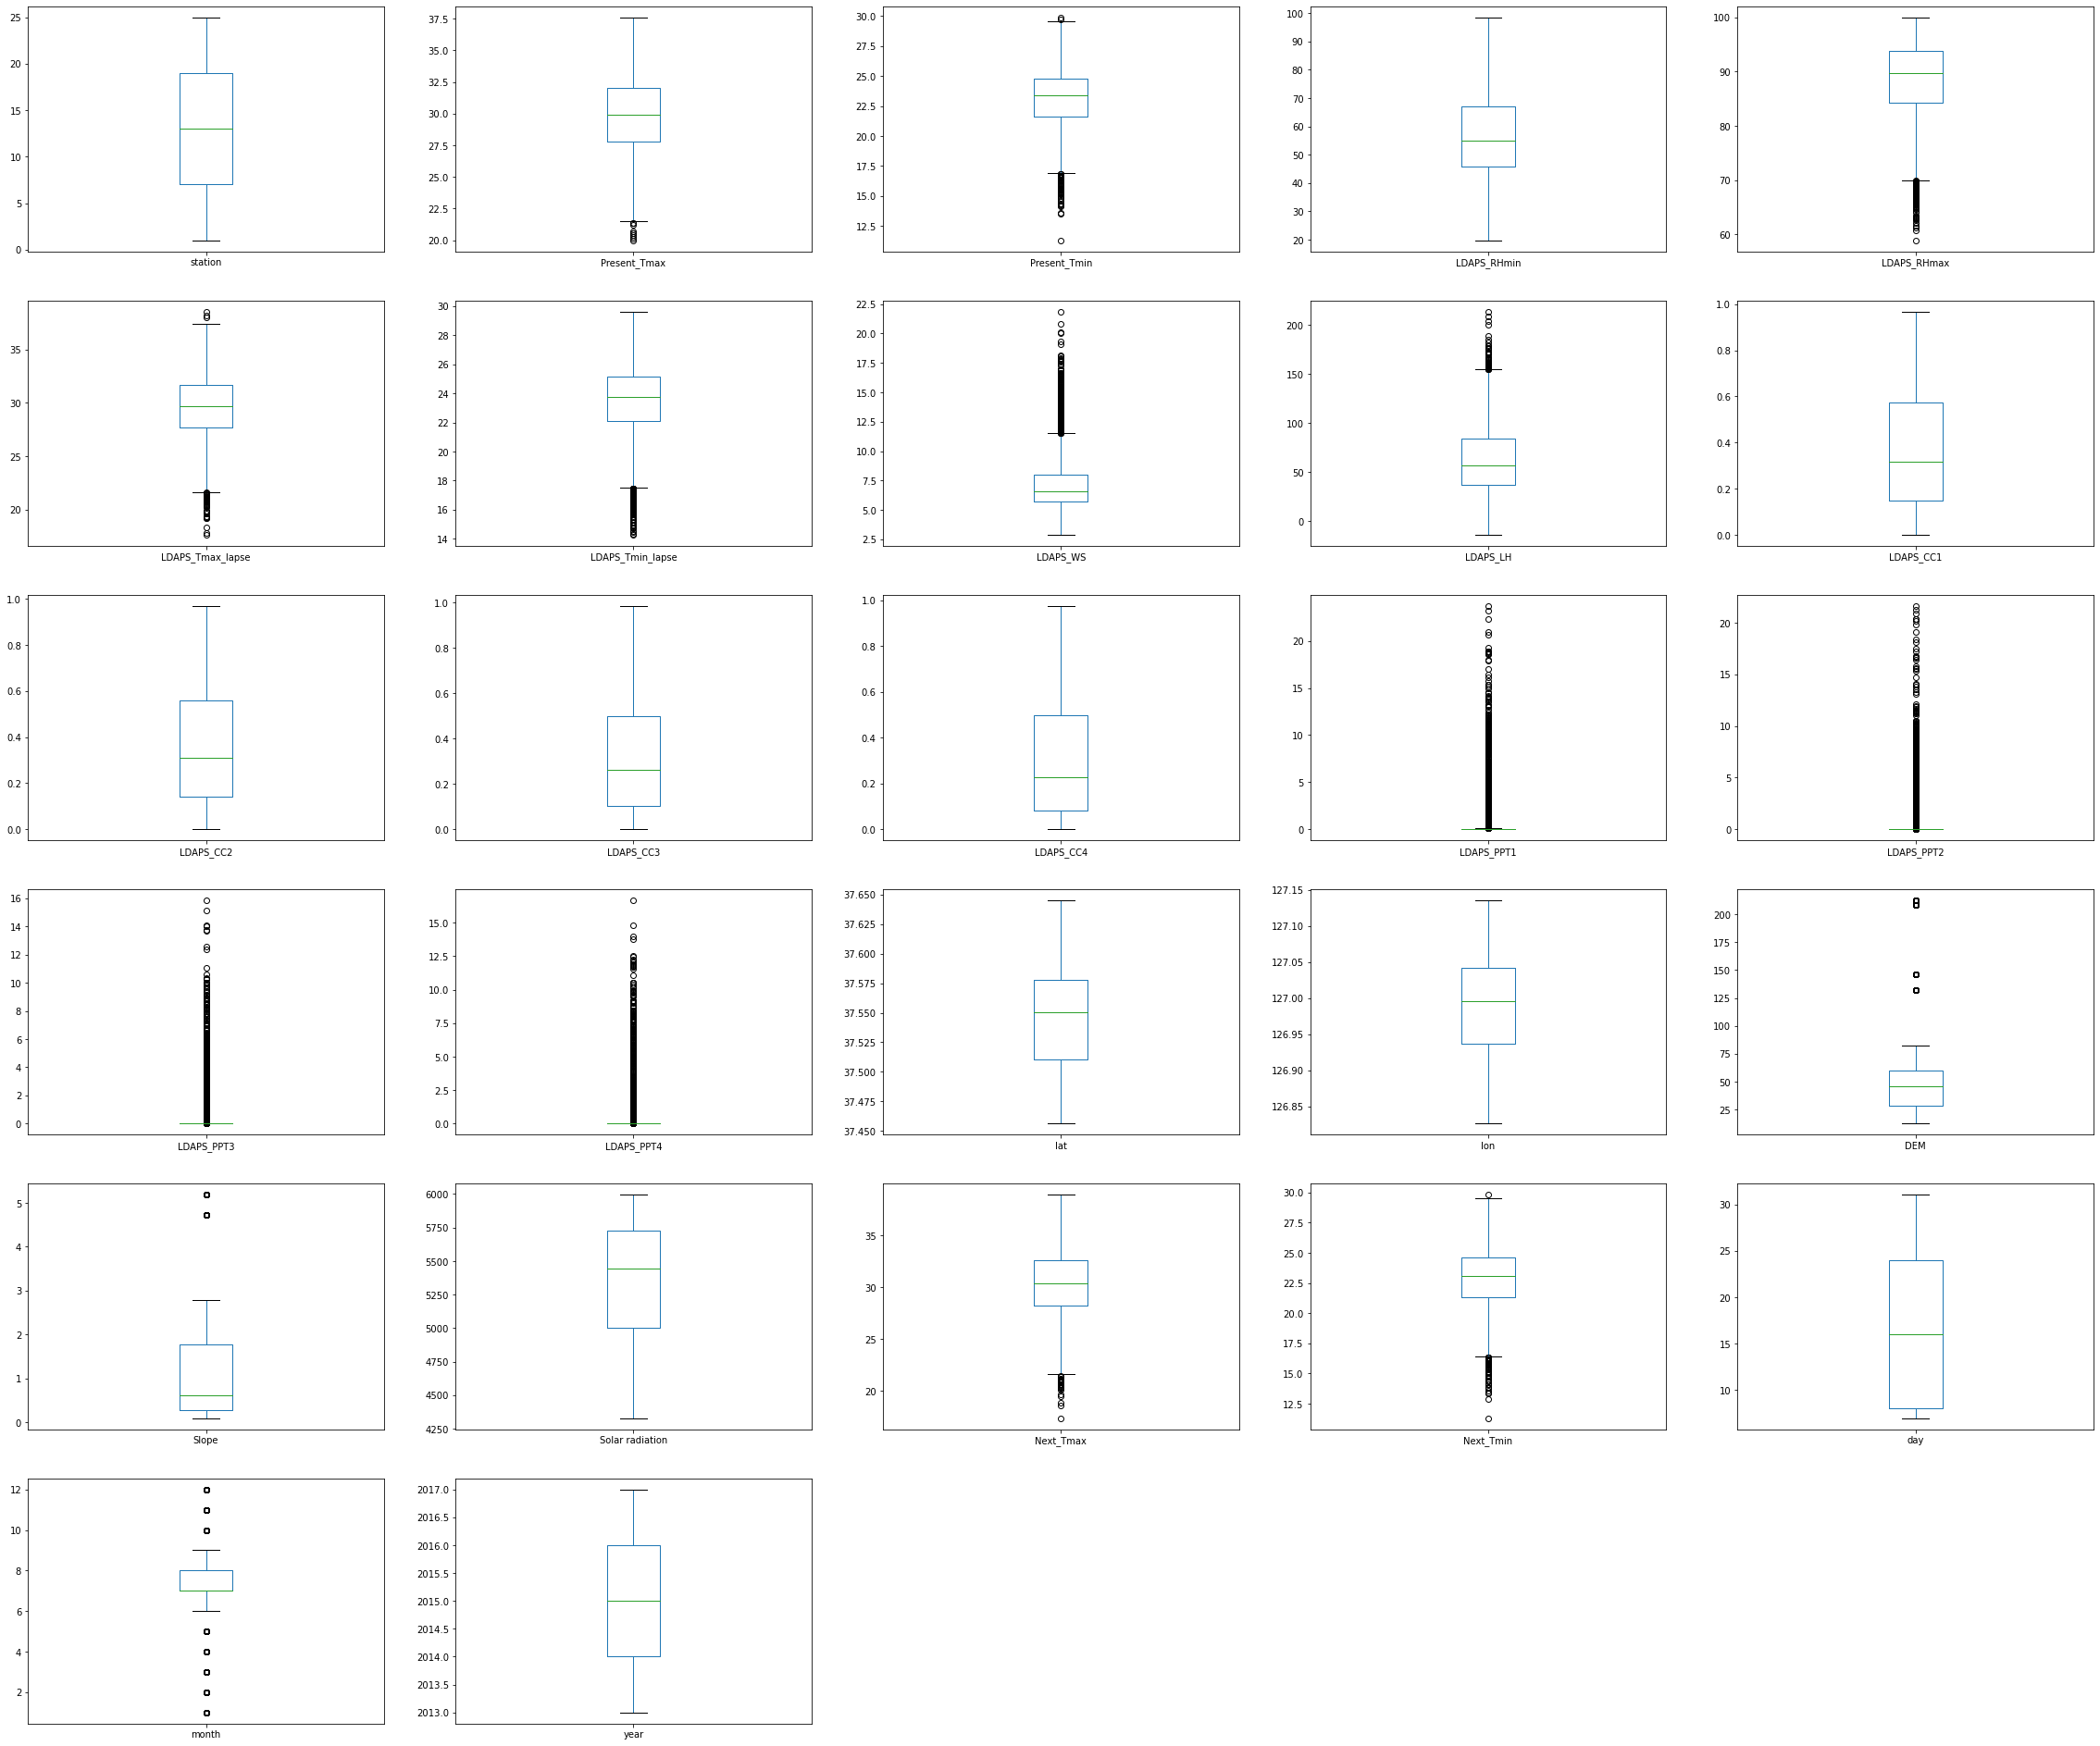

In [23]:
d.plot(kind="box",subplots=True,layout=(7,5),figsize=(40,40))

In [24]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.66286062, 0.47636887,
        1.41176669],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.66286062, 0.47636887,
        1.41176669],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.66286062, 0.47636887,
        1.41176669],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 1.66286062, 0.41559584,
        1.42353686],
       [1.52214457, 2.17321212, 2.28923218, ..., 1.66286062, 0.41559584,
        1.42353686],
       [1.66069897, 2.20691387, 2.41419461, ..., 1.66286062, 0.41559584,
        1.42353686]])

In [25]:
threshold=3
print(np.where(z>3))
d2=d[(z<3).all(axis=1)]
d2

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [26]:
d2.shape

(6739, 27)

# for next max temperature

In [28]:
x=d2.drop(['Next_Tmax'],axis=1)
y=d2['Next_Tmax']

# testing on various models

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score

In [31]:
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm.score(x_train, y_train)

0.7914822863218487

In [32]:
lm.score(x_test,y_test)

0.7724850254316165

In [33]:
r2_score(pred,y_test)

0.7139037797222738

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
lm=LinearRegression
dtc=DecisionTreeRegressor()
KN=KNeighborsRegressor()
svr=SVR()
Rf=RandomForestRegressor()

In [35]:
model=[dtc,KN,svr,Rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    
    print(r2_score(predm,y_test))

    print('\n')

0.7499794852381131


0.06082663837372626


-407.754067154091


0.8709873743707




we willuse Linear Regression model

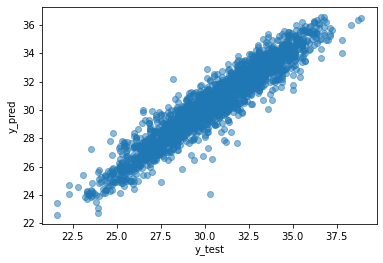

In [37]:
plt.scatter(y_test, predm, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.0656195426481383
MSE: 1.9466748424570943
RMSE: 1.3952328990018457


In [39]:
dfr=pd.DataFrame({"Actual maxTemp":y_test,"Predicted maxTemp":predm})
dfr

,Actual maxTemp,Predicted maxTemp
491,30.9,29.986
2867,30.2,29.238
5274,33.3,32.277
2344,35.1,34.010
2521,31.2,31.576
...,...,...
3645,31.5,31.889
7436,27.4,29.855
1102,32.7,33.191
566,26.3,27.284


# for next min temperature

In [46]:
x=d2.drop(["Next_Tmin"],axis=1)
y=d2["Next_Tmin"]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score

In [49]:
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm.score(x_train, y_train)

0.844307017981276

In [50]:
lm.score(x_test,y_test)

0.8327421977428857

In [51]:
r2_score(pred,y_test)

0.7963080560194521

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
lm=LinearRegression
dtc=DecisionTreeRegressor()
KN=KNeighborsRegressor()
svr=SVR()
Rf=RandomForestRegressor()

In [53]:
model=[dtc,KN,svr,Rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    
    print(r2_score(predm,y_test))

    print('\n')

0.7740846303011149


0.054510646587415335


-64.1157671969592


0.8769580448680414




we will use linear regression model

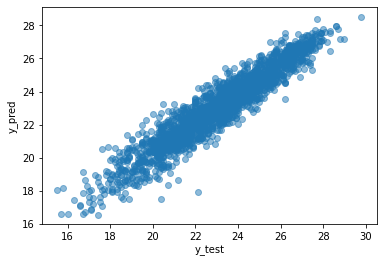

In [54]:
plt.scatter(y_test, predm, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.7577794100834634
MSE: 0.9080726507547642
RMSE: 0.9529284604600516


In [56]:
dfr=pd.DataFrame({"Actual minTemp":y_test,"Predicted minTemp":predm})
dfr

,Actual minTemp,Predicted minTemp
491,22.0,23.631
2867,21.8,21.640
5274,26.9,27.007
2344,23.7,24.477
2521,21.9,22.241
...,...,...
3645,25.3,24.573
7436,21.4,21.317
1102,25.9,26.048
566,24.2,23.836
